In [37]:
import models as md

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, roc_curve, auc

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# # Upsampling to reduce class imbalance
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=589, ratio = 1.0)
# X_SMOTE, y_SMOTE = sm.fit_sample(X_train, y_train)
# print(len(y_SMOTE))
# print(y_SMOTE.sum())

In [3]:
df = pd.read_csv('working_data.csv')

In [4]:
y = df['Default']
X = df.drop(columns='Default', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=123)

# Baseline Model

We built a basic Decision Tree as our baseline model.

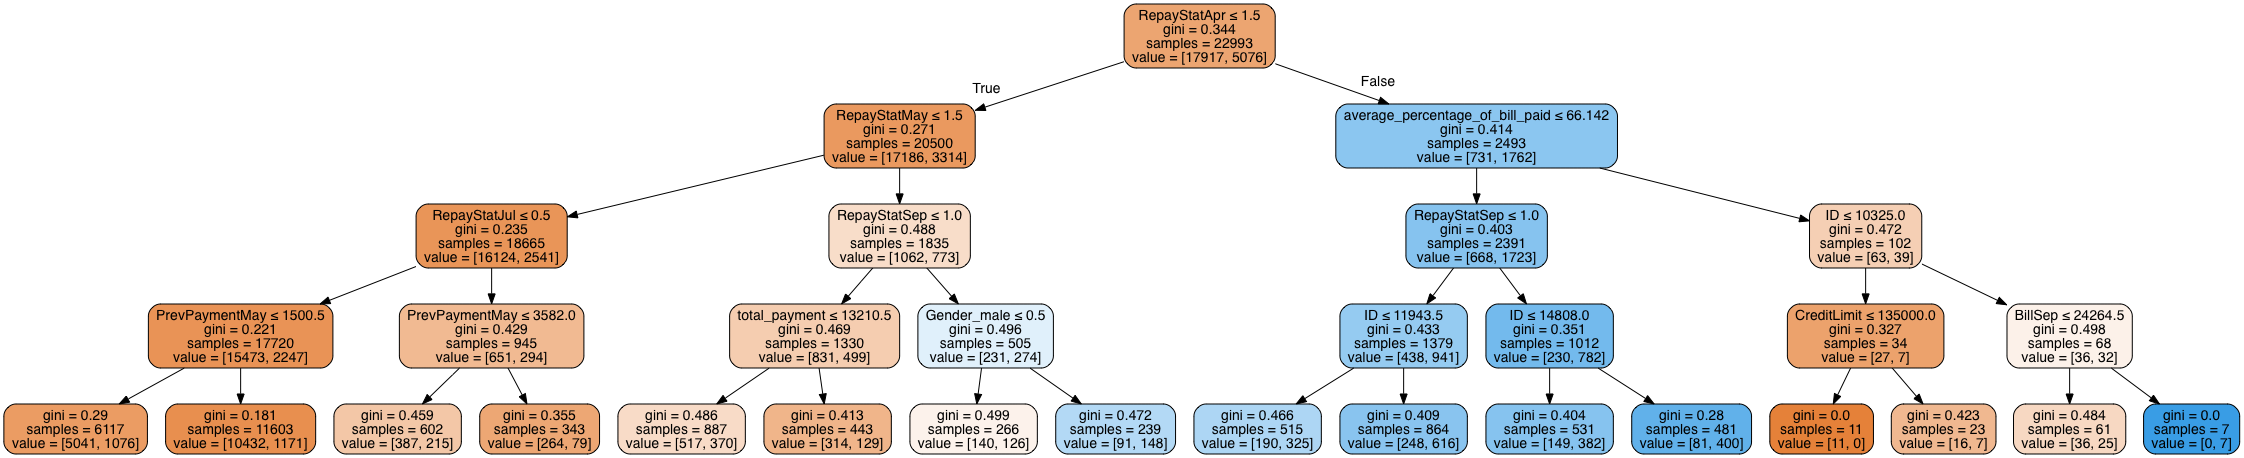

In [8]:
md.PlotDecisionTree(X_train, X_test, y_train, y_test)

Training Accuracy for Decision Tree Classifier: 100.0%
Testing Accuracy for Decision Tree Classifier: 73.49%


Confusion Matrix 

Predicted     0     1   All
True                       
0          3713   824  4537
1           700   512  1212
All        4413  1336  5749
None 

 Classification Report 

               precision    recall  f1-score   support

           0       0.84      0.82      0.83      4537
           1       0.38      0.42      0.40      1212

    accuracy                           0.73      5749
   macro avg       0.61      0.62      0.62      5749
weighted avg       0.74      0.73      0.74      5749



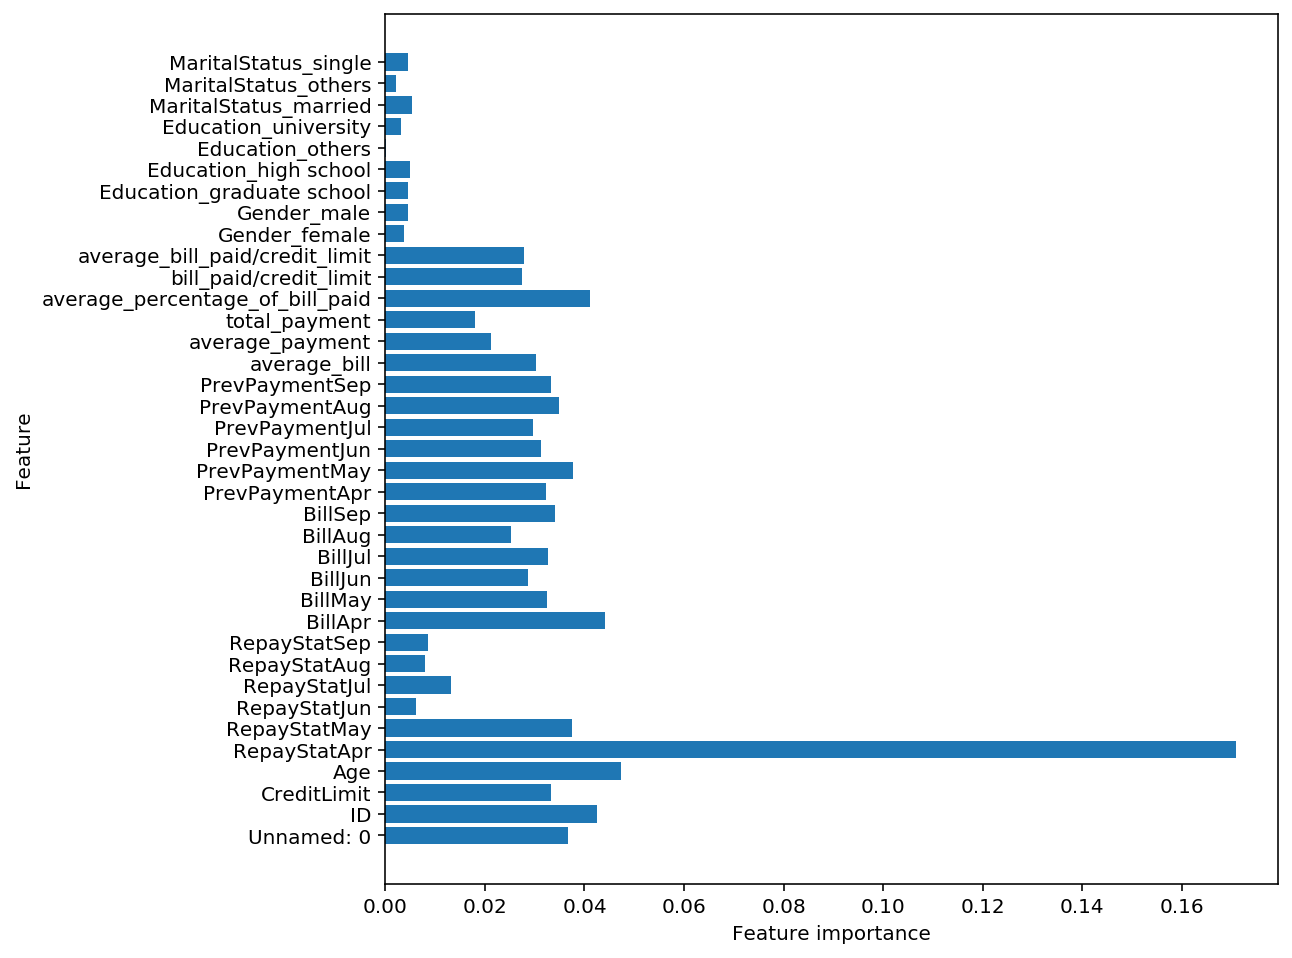

In [12]:
md.DecisionTree(X_train, X_test, y_train, y_test)

---------
AUC Score: 0.620412217549725
---------


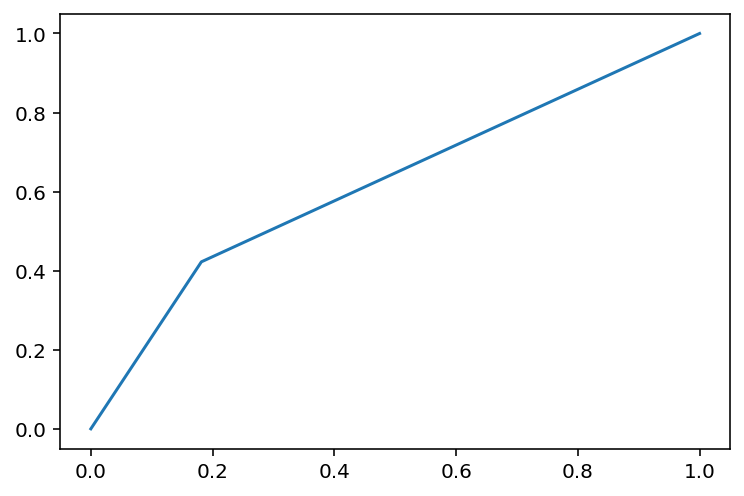

In [13]:
md.PlotRocCurve(X_train, X_test, y_train, y_test)

# Bagged Tree

We then optimised our Baseline Models, using Grid Search to find optimal parameters. We used pipeline to run various iterations of the learner, and then input the most effective parameters for our final Bagged Decision Tree Model.

Confusion Matrix 

Predicted     0    1   All
True                      
0          4257  280  4537
1           804  408  1212
All        5061  688  5749
None 

 Classification Report 

               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4537
           1       0.59      0.34      0.43      1212

    accuracy                           0.81      5749
   macro avg       0.72      0.64      0.66      5749
weighted avg       0.79      0.81      0.79      5749

Training Accuracy for Bagging Tree Classifier: 98.04%
Testing Accuracy for Bagging Tree Classifier: 81.14%


---------
AUC Score: 0.7253270869295438
---------


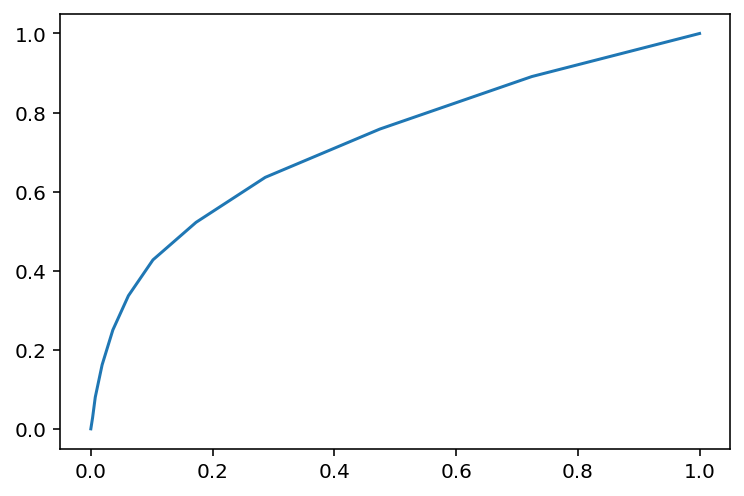

In [25]:
md.BaggedTree(X_train, X_test, y_train, y_test)

In [39]:
scorer = md.scorer()

In [62]:
# Create the pipeline
pipe = Pipeline([('bc', BaggingClassifier(DecisionTreeClassifier(random_state=123))
                 )])



# Create the grid parameter
grid = [{'n_estimators': [5,6,7,8]}]

# Create the grid, with "pipe" as the estimator
gridsearch = GridSearchCV(estimator=pipe,param_grid=grid, cv=3)

# Fit using grid search
gridsearch.fit(X_train, y_train)

ValueError: Invalid parameter n_estimators for estimator Pipeline(memory=None,
         steps=[('bc',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                         class_weight=None,
                                                                         criterion='gini',
                                                                         max_depth=None,
                                                                         max_features=None,
                                                                         max_leaf_nodes=None,
                                                                         min_impurity_decrease=0.0,
                                                                         min_impurity_split=None,
                                                                         min_samples_leaf=1,
                                                                         min_samples_split=2,
                                                                         min_weight_fraction_leaf=0.0,
                                                                         presort='deprecated',
                                                                         random_state=123,
                                                                         splitter='best'),
                                   bootstrap=True, bootstrap_features=False,
                                   max_features=1.0, max_samples=1.0,
                                   n_estimators=10, n_jobs=None,
                                   oob_score=False, random_state=None,
                                   verbose=0, warm_start=False))],
         verbose=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [72]:
# def OptimiseBagging():
#     param_grid = {'n_estimators': [5,6,7,8,9,10],
#                   'max_features' : [10,11,12,13,14,15]   
#                     }

#     gs_bt = GridSearchCV(bagged_tree, param_grid, cv=5, scoring=scorer)
#     gs_bt.fit(X_train, y_train)
    
def OptimiseBagging(X_train, X_test, y_train, y_test):
    
    tree = BaggingClassifier(DecisionTreeClassifier(random_state=123))
    
    param_grid = {'n_estimators': [5,6,7]
                    }

    gs_bt = GridSearchCV(tree, param_grid, cv=5, scoring=scorer)
    gs_bt.fit(X_train, y_train)
    print(gs_bt.best_params_)
#     print(gs_bt.cv_results_)
        

In [73]:
OptimiseBagging(X_train, X_test, y_train, y_test)

{'n_estimators': 7}


In [ ]:
gs_bt.best_params_, gs_bt.best_index_

In [ ]:
cvs = pd.DataFrame(gs_bt.cv_results_)
cvs.head()

# Random Forrest

Confusion Matrix 

Predicted     0    1   All
True                      
0          4299  238  4537
1           756  456  1212
All        5055  694  5749
None 

 Classification Report 

               precision    recall  f1-score   support

           0       0.85      0.95      0.90      4537
           1       0.66      0.38      0.48      1212

    accuracy                           0.83      5749
   macro avg       0.75      0.66      0.69      5749
weighted avg       0.81      0.83      0.81      5749

Training Accuracy for Random Forest Classifier 100.0%
Testing Accuracy for Random Forest Classifier: 82.71%


---------
AUC Score: 0.7617606536937581
---------


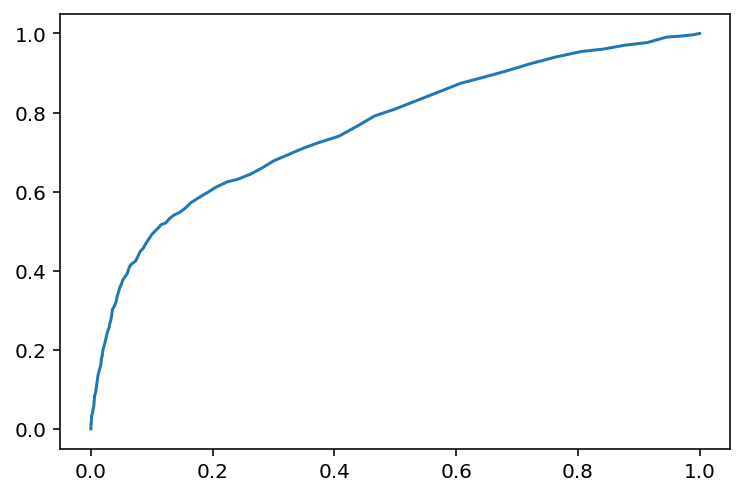

In [33]:
md.RandomForest(X_train, X_test, y_train, y_test)

In [54]:
# Create the pipeline
pipe = Pipeline([('rf', RandomForestClassifier(random_state=123)),
                ])

# Create the grid parameter
grid = [{'criterion': ['gini','entropy'],
        'max_depth' : [5,7,9,11],
        'max_features' : [5,7,9,11],
        'n_estimators' : [8,10,12,14]}]

# Create the grid, with "pipe" as the estimator
gridsearch = GridSearchCV(estimator=pipe,
                  param_grid=grid,
                  scoring=scorer,
                  cv=3)

# Fit using grid search
gridsearch.fit(X_train, y_train)

# RandomForestClassifier.get_params(RandomForestClassifier()).keys()

ValueError: Invalid parameter criterion for estimator Pipeline(memory=None,
         steps=[('rf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=123,
                                        verbose=0, warm_start=False))],
         verbose=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
param_grid = {'criterion': ['gini','entropy'],
              'max_depth' : [5,7,9,11],
              'max_features' : [5,7,9,11],
              'n_estimators' : [8,10,12,14]
                }

gs_rf = GridSearchCV(forest, param_grid, cv=5, scoring=scorer)
gs_rf.fit(X_train, y_train)

In [ ]:
gs_rf.best_params_